## **I. Reading target variables**

### **1. Overview of target variables**

In [1]:
import pandas as pd

file_path = "../input/Training_data_uhi_index.csv"
df_uhi = pd.read_csv(file_path)

In [2]:
print(df_uhi.head())

   Longitude   Latitude          datetime  UHI Index
0 -73.909167  40.813107  24-07-2021 15:53   1.030289
1 -73.909187  40.813045  24-07-2021 15:53   1.030289
2 -73.909215  40.812978  24-07-2021 15:53   1.023798
3 -73.909242  40.812908  24-07-2021 15:53   1.023798
4 -73.909257  40.812845  24-07-2021 15:53   1.021634


In [6]:
df_uhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11229 entries, 0 to 11228
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  11229 non-null  float64
 1   Latitude   11229 non-null  float64
 2   datetime   11229 non-null  object 
 3   UHI Index  11229 non-null  float64
dtypes: float64(3), object(1)
memory usage: 351.0+ KB


In [7]:
# Convert datetime field to proper date time format
df_uhi['datetime'] = pd.to_datetime(df_uhi['datetime'], format="%d-%m-%Y %H:%M")
print(df_uhi.dtypes)

Longitude           float64
Latitude            float64
datetime     datetime64[ns]
UHI Index           float64
dtype: object


### **2. Descriptive Analysis**

          Longitude      Latitude                       datetime     UHI Index
count  11229.000000  11229.000000                          11229  11229.000000
mean     -73.933927     40.808800  2021-07-24 15:34:29.056906240      1.000001
min      -73.994457     40.758792            2021-07-24 15:01:00      0.956122
25%      -73.955703     40.790905            2021-07-24 15:22:00      0.988577
50%      -73.932968     40.810688            2021-07-24 15:36:00      1.000237
75%      -73.909647     40.824515            2021-07-24 15:48:00      1.011176
max      -73.879458     40.859497            2021-07-24 15:59:00      1.046036
std        0.028253      0.023171                            NaN      0.016238


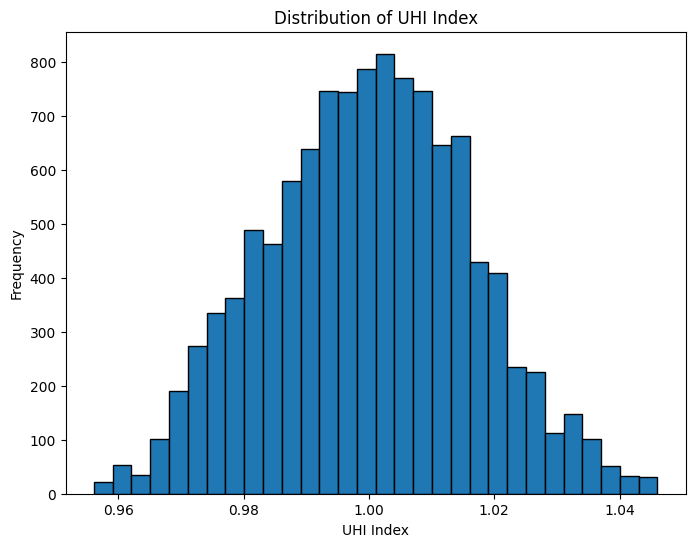

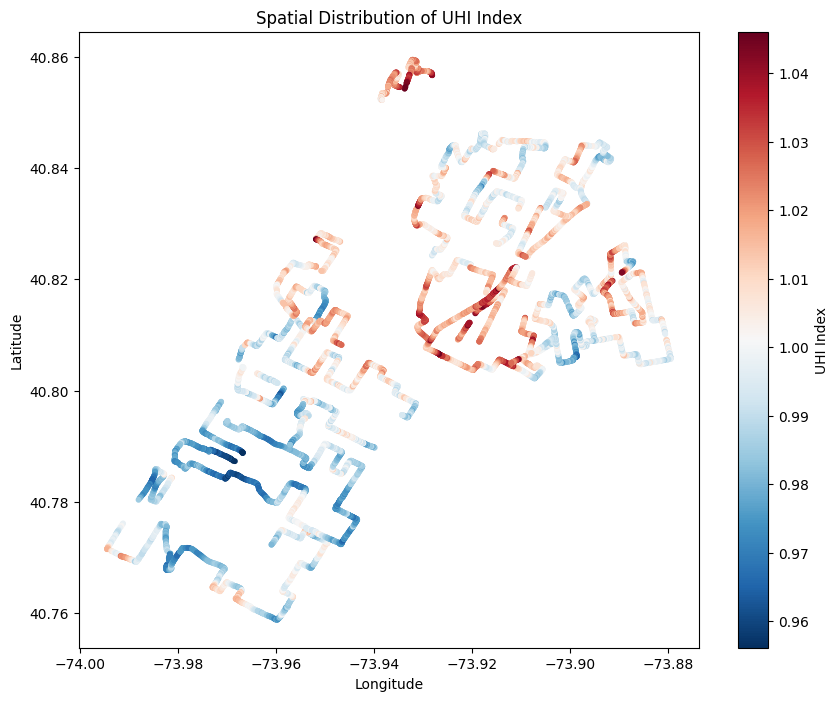

In [8]:
print(df_uhi.describe())

import matplotlib.pyplot as plt

# Histogram of UHI Index
plt.figure(figsize=(8, 6))
plt.hist(df_uhi['UHI Index'], bins=30, edgecolor='black')
plt.xlabel('UHI Index')
plt.ylabel('Frequency')
plt.title('Distribution of UHI Index')
plt.show()

# Scatter plot of UHI Index vs. Longitude/Latitude
plt.figure(figsize=(10, 8))
plt.scatter(df_uhi['Longitude'], df_uhi['Latitude'], c=df_uhi['UHI Index'], cmap='RdBu_r', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of UHI Index')
plt.colorbar(label='UHI Index')
plt.show()

***Observations:***

Some thoughts from the above analysis:
- Normal distribution of UHI Index
- The spatial patterns suggest a geographical & urban distribution that influence the UHI index, as expected.

***Indication:***
- We need to incorporate spatial info into our model. Things like: building footprint, satellite, traffics.
- Good things: No missing data or outlier.

In [10]:
import geopandas as gpd
df_uhi_geo = gpd.GeoDataFrame(df_uhi, geometry=gpd.points_from_xy(df_uhi.Longitude, df_uhi.Latitude), crs="EPSG:4326")
print(df_uhi_geo.crs)

EPSG:4326
